#### 1. Importando
* Ahora importo altair porque los graficos son mejores

In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import altair as alt
from nltk.corpus import stopwords
from unidecode import unidecode

#### 2. Base y Etiquetado

In [2]:
url = "https://raw.githubusercontent.com/fferegrino/cf-ml/main/quien-esta-hablando/dialogos.csv"
df = pd.read_csv(url, index_col=0)

In [56]:
df.sample(3)

,speaker,dialog,length,tipo_speaker
137663,amlo,"Ahora, también para los ambientalistas, coment...",402,politico
70565,amlo,¡Viva México!,13,politico
118558,amlo,¿Qué sucedió?,13,politico


In [3]:
df['tipo_speaker'] = np.where(df['speaker'] =='amlo','politico','medico')

#### EDA
* Que quiero hacer?
    * Quiero predecir segun las columna dialog el tipo_speaker
* Como lo analizo?
    * El tamano de los dialogos es igual para los dos?
    * Las palabras mas repetida en cada tipo
    * De que tipo_speaker tengo mas tengo

In [55]:
#agrupo por speaker
cuenta_frq = df.groupby(
    ['tipo_speaker'], 
    as_index=False)['speaker'].count()
# saco el % de cada speaker
cuenta_frq['speaker']= round(
    cuenta_frq['speaker'] / sum(cuenta_frq['speaker']),1)
# Graficando
barra = alt.Chart(cuenta_frq, title = 'Freq por Tipo Speaker').mark_bar().encode(
           y = alt.Y('tipo_speaker',
                axis = alt.Axis(title=None)),
            x = alt.X(
                'speaker',
                axis = None),
        )

texto = barra.mark_text(
    color='white',
    align = 'right',
    dx = -5,
    size = 12
    ).encode(
    text = alt.Text(
        'speaker',
        format = '.0%'),
    )

barra + texto


alt.LayerChart(...)

alt.Chart(df[['length','tipo_speaker']]).mark_boxplot().encode(
    x = 'tipo_speaker',
    y = 'length'
)

<AxesSubplot:title={'center':'length'}, xlabel='tipo_speaker'>

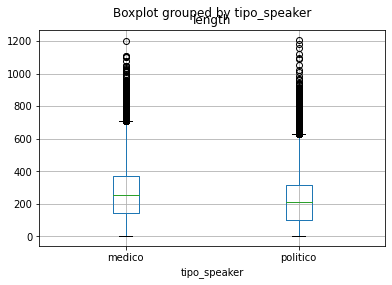

In [91]:
df[['length','tipo_speaker']].boxplot(column = 'length', by='tipo_speaker' )

In [ ]:
%pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [93]:
texto = df['dialog'].values

WordCloud().generate(str(texto))

NameError: name 'WordCloud' is not defined